In [1]:
import numpy as np
import pandas as pd
read_b = pd.read_html("https://fbref.com/en/squads/206d90db/2022-2023/Barcelona-Stats#all_matchlogs")
read_r = pd.read_html("https://fbref.com/en/squads/53a2f082/2022-2023/matchlogs/all_comps/schedule/Real-Madrid-Scores-and-Fixtures-All-Competitions")

In [2]:
dfr= read_r[0]
dfb= read_b[1]

dfb

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0,0,Rayo Vallecano,1.9,0.5,67,81104,Sergio Busquets,4-3-3,Alejandro Hernández,Match Report,NaN
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4,1,Real Sociedad,2.1,0.8,58,36201,Marc-André ter Stegen,3-2-4-1,José Luis Munuera,Match Report,NaN
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4,0,Valladolid,2.6,0.8,67,83972,Sergio Busquets,4-3-3,Ricardo de Burgos,Match Report,NaN
3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3,0,Sevilla,4.0,1.0,54,40233,Sergio Busquets,4-3-3,Antonio Matéu Lahoz,Match Report,NaN
4,2022-09-07,21:00,Champions Lg,Group stage,Wed,Home,W,5,1,cz Viktoria Plzeň,2.3,0.8,76,77411,Sergi Roberto,4-3-3,Lawrence Visser,Match Report,NaN
5,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4,0,Cádiz,3.4,0.4,70,19530,Sergio Busquets,4-3-3,Carlos del Cerro,Match Report,NaN
6,2022-09-13,21:00,Champions Lg,Group stage,Tue,Away,L,0,2,de Bayern Munich,2.0,1.7,53,75000,Sergio Busquets,4-3-3,Danny Makkelie,Match Report,NaN
7,2022-09-17,16:15,La Liga,Matchweek 6,Sat,Home,W,3,0,Elche,3.9,0.0,76,85073,Marc-André ter Stegen,4-3-3,Alejandro Muñíz,Match Report,NaN
8,2022-10-01,21:00,La Liga,Matchweek 7,Sat,Away,W,1,0,Mallorca,0.7,1.2,71,18103,Sergio Busquets,4-3-3,Jesús Gil,Match Report,NaN
9,2022-10-04,21:00,Champions Lg,Group stage,Tue,Away,L,0,1,it Inter,0.5,0.2,71,71368,Sergio Busquets,4-3-3,Slavko Vinčič,Match Report,NaN


In [3]:
dfr = dfr[["Comp", "Result", "Venue"]]
def games_played(y):
    if y in my_dict:
    # If the key exists, increment its value
        my_dict[y] += 1
    else:
    # If the key doesn't exist, add it with an initial value of 1
        my_dict[y] = 1
    return my_dict
my_dict = {}
dfr["Comp"].apply(games_played)
my_dict

{'Super Cup': 1,
 'La Liga': 38,
 'Champions Lg': 12,
 'Copa del Rey': 6,
 'Supercopa de España': 2}

In [4]:
def clean_result(x):
    if x == "W":
        return 1
    elif x == "L":
        return 0
    elif x == "D":
        return 0
    
def clean_venue(x):
    if x == "Home":
        return 1
    elif x == "Away":
        return 0
def games_played(y):
    if y in my_dict:
    # If the key exists, increment its value
        my_dict[y] += 1
    else:
    # If the key doesn't exist, add it with an initial value of 1
        my_dict[y] = 1
    
# dfr["Result"] = dfr["Result"].apply(lambda x: clean_result(x))
# dfr["Venue"] = dfr["Venue"].apply(lambda x: clean_venue(x))
dfr.loc[:, "Result"] = dfr["Result"].apply(lambda x: clean_result(x))
dfr.loc[:, "Venue"] = dfr["Venue"].apply(lambda x: clean_venue(x))

In [5]:
dfr_g = dfr.groupby(["Comp"]).sum()

In [6]:
dfr_g.loc[:,"Games Played"] = dfr_g.index.map(my_dict)
dfr_g["Win-Ratio"] = dfr_g["Result"]/dfr_g["Games Played"]
dfr_g

,Result,Venue,Games Played,Win-Ratio
Comp,,,,
Champions Lg,8,6,12,0.666667
Copa del Rey,5,3,6,0.833333
La Liga,24,19,38,0.631579
Super Cup,1,1,1,1.0
Supercopa de España,0,2,2,0.0


In [7]:
#Repeating the same process with FCB
dfb = dfb[["Comp", "Result", "Venue"]]
dfb
def games_played(y):
    if y in my_dict:
        my_dict[y] += 1
    else:
        my_dict[y] = 1
    return my_dict

my_dict = {}
dfb["Comp"].apply(games_played);
my_dict

{'La Liga': 38,
 'Champions Lg': 6,
 'Copa del Rey': 5,
 'Supercopa de España': 2,
 'Europa Lg': 2}

In [8]:
def clean_result(x):
    if x == "W":
        return 1
    elif x == "L":
        return 0
    elif x == "D":
        return 0

def clean_venue(x):
    if x == "Home":
        return 1
    elif x == "Away":
        return 0

dfb.loc[:, "Result"] = dfb["Result"].apply(lambda x: clean_result(x))
dfb.loc[:, "Venue"] = dfb["Venue"].apply(lambda x: clean_venue(x))
dfb

,Comp,Result,Venue
0,La Liga,0,1
1,La Liga,1,0
2,La Liga,1,1
3,La Liga,1,0
4,Champions Lg,1,1
5,La Liga,1,0
6,Champions Lg,0,0
7,La Liga,1,1
8,La Liga,1,0
9,Champions Lg,0,0


In [9]:
dfb_g = dfb.groupby(["Comp"]).sum()
dfb_g.loc[:, "Games Played"] = dfb_g.index.map(my_dict)
dfb_g["Win-Ratio"] = dfb_g["Result"] / dfb_g["Games Played"]
dfb_g

,Result,Venue,Games Played,Win-Ratio
Comp,,,,
Champions Lg,2,3,6,0.333333
Copa del Rey,4,2,5,0.8
Europa Lg,0,1,2,0.0
La Liga,28,19,38,0.736842
Supercopa de España,1,0,2,0.5


In [10]:
import matplotlib.pyplot as plt
dfr_g = dfr_g[["Win-Ratio"]]
dfr_g.rename(columns={'Win-Ratio': 'WR RMA'}, inplace=True)

C:\Users\abcd\AppData\Local\Temp\ipykernel_2424\2752900487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr_g.rename(columns={'Win-Ratio': 'WR RMA'}, inplace=True)


In [11]:
dfb_g = dfb_g[["Win-Ratio"]]
dfb_g.rename(columns={'Win-Ratio': 'WR FCB'}, inplace=True)

C:\Users\abcd\AppData\Local\Temp\ipykernel_2424\3281459813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb_g.rename(columns={'Win-Ratio': 'WR FCB'}, inplace=True)


In [12]:
df = pd.merge(dfr_g, dfb_g, left_index=True, right_index=True)
df

,WR RMA,WR FCB
Comp,,
Champions Lg,0.666667,0.333333
Copa del Rey,0.833333,0.8
La Liga,0.631579,0.736842
Supercopa de España,0.0,0.5


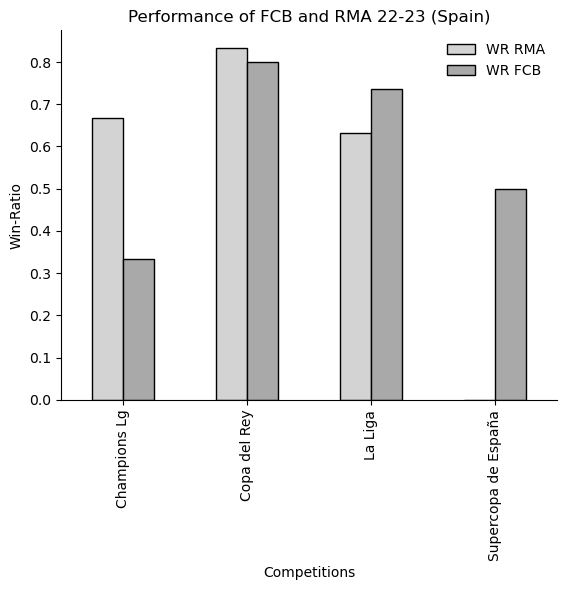

In [42]:
colors = ["LightGrey","DarkGrey"]
df.plot(kind="bar", color=colors, edgecolor="black")
fig = plt.gca()
# fig.set_facecolor('LightBlue')
fig.set_title("Performance of FCB and RMA 22-23 (Spain)");
fig.legend(frameon=False)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.set_xlabel("Competitions")
fig.set_ylabel("Win-Ratio");
# fig.spines['left'].set_visible(False)
# fig.spines['bottom'].set_visible(False)